# Decision Tree Classifiers: Random Forest + Noisy Dataset Tutorial

**Notebook 3 of 3**

In this tutorial we will look at how Random Forest classifiers can improve predictions on noisy datasets when simple machine learning models, such as Linear Regression aren't up to the task. The data set we will use is the cleaned dataset you used in the first Data Preparation Tutorial for Machine Learning. 

**Notebook 3: Random Forest + Noisy Dataset** will show you how Random Forest classifiers can outperform Linear Regression on noisy datasets. Random Forests are an ensemble method that averages the predictions of multiple decision trees to arrive at more robust and generalized solutions.

We will use the cleaned dataset from the Linear Regression tutorial. To generate that dataset, many anomailes such as unusual data points that don't follow the overall pattern and missing/incorrect values had to be corrected using assumptions.  Those anomalies introduced noise in the dataset, it is also noisy because it is a smaller dataset than typical for an ML application. 

Correcting or cleaning the data may have allowed for more statistically "accurate" outputs, but the alterations made to the data to achieve this accuracy may also have significantly impacted the representation of the real world phenomena that this data represented. The further your data model takes you from the real world phenomena, the wider your ethical gap becomes because there are biases introduced into the data set that you are building. 

In the first tutorial you saw how the Linear Regression model can make predictions of output data based on previously unseen input data by essentially drawing the "line of best fit" through all of the input data it was trained on. Linear regression is a widely used and intuitive technique for modeling relationships between variables. However, its assumptions of linearity do not often apply in real world datasets because, like the phenomena the data points represent, these data sets are messy: they contain random variations or errors, anomalies or complex nonlinear patterns. All of these complexities create "noise" in a data set that will impact the prediction accuracy of the machine learning algorythm. The algorythm will search for a "signal,"  in the noise to guide its prediction model, using information that depends on one or more independent variables, such as time, space, frequency, etc. Regression is too simple a model to accurately predict outputs when faced with noisy data where the signal is obscured; the model ends up over fitting the noise, which then means that it cannot accurately apply what the model learns in the training set, to new data. 

By the end of this tutorial, you should understand how Random Forests harness randomness and averaging to overcome issues like noise that affect Linear Regression models. Random Forests improve predictive outcomes on complex data sets.

We have already downloaded the datasets and you can find them in the tutorial repository.

# Learning objectives
Average time to complete 30min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning.
* Filling out the missing data, if needed.
* Visualize and analyze data to ensure it meets RDM best practices.
* Make the random forest classifer 
* Make prediction with the random forest classifier.
* Analyze the features to further improve the model.

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). 

As you learned in previous tutorials, remember to: 
* SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
* BACKUP YOUR DATA (3-2-1 rule)<br>

Notebook 2 Random Forest will continue to focus on:

DESCRIBE YOUR DATA

* Machine Friendly: Describe your dataset with a metadata standard for discovery.
* Human Friendly: Describe your variables, so your colleagues will understand what you meant. Data without good metadata is useless. Give your variables clear names.
* Do not leave cells blank -use numeric values clearly out of range to define missing (e.g. '99999') or not applicable (e.g. '88888') data anddescribe these in your data dictionary.
* Convert your data to open, non-proprietary formats 
* Name your files well with basic meta-data in the file names

In [1]:
# Depending where you are running the code, you may need to install the libraries.
# You can check if the libraries are installed by running !pip list in a cell.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [2]:
import warnings;
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
%matplotlib inline

In the Data Preparation Tutorial For Machine Learning, you will remember that many assumptions had to be made about errors in the data collection process to fill in missing data. We had to "infer," or make an informed guess, about the values for missing information and also the relationship between data points. This human intervention in the data, helped the Linear Regression model function and  give us outputs that seemed to predict future patterns of bike traffic according to weather conditions, based on past patterns represented in the data.  

But a more accurate prediction model would not rely on informed guesses, when other data variables were available that could augment the dataset. 

The cleaned data2020 dataset from the Linear Regression Tutorial was augmented for this tutorial to include more data from additional data sources. These are Open Data sources representing historical weather stats from Environment and Climate Change Canada. 


[Hours of Daylight](https://www.worlddata.info/america/canada/sunset.php)<br>
[UV Index](https://ottawa.weatherstats.ca/metrics/forecast_uv.html)<br>
[Relative humidity](https://ottawa.weatherstats.ca/metrics/relative_humidity.html)<br>

Following RDM best practices, these new variables have been labled in our combined dataset with clear names: "hours of daylight (hrs)", "UV Index", "holiday","weekday", "humidity".  We also converted the file to .csv because it is an open file format.


#### Cleaning your data

Make sure you have "data/MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv" that should have come with this notebook. This is a custom dataset that was generated from the data from "Data Cleaning and Linear Regression". If you don't have the dataset, you can download it from the tutorial's link [Decision Trees Tutorial](https://github.com/uOttawa-IT-Research-teaching/DecisionTrees).

As in the first Data Preparation for Machine Learning Tutorial, we will use Pandas library for our data cleaning.

We went through a detailed cleaning and review of the dataset in Notebook 1 Decision Trees. It is recommended to do a thorough review of the dataset by following the Linear Regression tutorial. In this tutorial, we'll just do a cursory overview to ensure the integrity of the cleaned dataset we are working with.

In [3]:
sns.set_palette("rainbow")
df = pd.read_csv('../data/MLTS_20240530_DTRF_DataBikeAndWeather2020_1.0.csv')

This data set follows good RDM practices because the variables of each column are clearly named. In this data set structure, we use commonly used weather and calendar data so no special knowledge or expertise is required to understand the values. Therefore, even if we didn't collect this data ourselves by measuring hundreds of weather and calendar data points, you can still reuse it with ease.
Since we only want to get a cursory look at the data at this stage, an alternated way to present the data is to just look at the first five rows of data.

In [4]:
df.head(5)

,prefRoute,Max Temp (°C),Total Rain (mm),Total Snow (cm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h),hours of daylight (hrs),UV Index,holiday,weekday,humidity
0,ADAWE,1.1,0.0,0.0,15,26.0,35,9.2,1.2,1,3,0.8
1,LMET,4.4,0.0,0.0,15,20.0,41,9.2,1.2,0,4,0.8
2,LMET,4.7,0.0,0.0,6,22.2,45,9.2,1.2,0,5,0.7
3,LMET,1.4,0.0,1.8,4,22.2,45,9.2,1.2,0,6,0.4
4,ADAWE,-3.0,0.0,0.0,6,28.0,37,9.2,1.2,0,7,0.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   prefRoute                  365 non-null    object 
 1   Max Temp (°C)              365 non-null    float64
 2   Total Rain (mm)            365 non-null    float64
 3   Total Snow (cm)            365 non-null    float64
 4   Snow on Grnd (cm)          365 non-null    int64  
 5   Dir of Max Gust (10s deg)  365 non-null    float64
 6   Spd of Max Gust (km/h)     365 non-null    int64  
 7   hours of daylight (hrs)    365 non-null    float64
 8   UV Index                   365 non-null    float64
 9   holiday                    365 non-null    int64  
 10  weekday                    365 non-null    int64  
 11  humidity                   365 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.3+ KB


The clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary of the data set on the City of Ottawa Open Data website explains that these columns represent aspects of the various routes that data was collected on. 

*Non-null* values are the number of days that the equipment registered "counts of bike trips (both directions summed unless otherwise noted)" <br>
*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>
*int64* values indicate that the variable contains integer numerical data.<br>
*object* values indicate that the variable contains categorical or textual data rather than numerical.<br>

Notice that we have 365 entries (one for each day), and if we look at the measurements, we see we have 365 non-null values. *This indicates no missing data!*. We also notice that the datatypes for the measurements are all numerical datatypes (float64 and int64).  This is important since performing math functions can only work with numerical data. The model will be built using the numerical data which are the features or measurements taken.  The variable prefRoute represents the groups or classes we are trying to predict so no calculations are performed on it per se.

In this case, we have a bike counter that counts bikes, so no expertise required to understand that value! Let's plot some of the data.

In [6]:
#df.columns
df.groupby('prefRoute').size()

prefRoute
ADAWE    180
ALEX       5
COBY      19
CRTZ      39
LMET      93
OBVW       2
OGLD       2
ORPY      25
dtype: int64

Now let's analyze the data. Our 365 row dataset is split unequally among the bike routes so that tells us that the data is skewed.  There is far more data for the ADAWE route than any others. It is in stark contrast to the Iris dataset we saw in Notebook 2, which had a more even distribution of the data along a statistical curve. So what? Many real-world phenomena have this uneven distribution, but models such as Linear Regression are not sophistcated enough to be able to handle the data at the smaller end of the curve (the outliers) even though they are important to the predictive output. We want to know the weather patterns on all cyclist routes, not just the busiest routes! This is where a Random Forest model can be more inclusive. 

Next, we will take a look at the pair plot to get insight into the distribution and relationships among the data.

Pandas has a lot of useful functions used as *methods for data exploration.* The .pairplot() function generates a Pairplot visualizaition, plotting the data points on a graph to find the relationship between them, either continuous or catagorical. Through this exploratory data visualization, we can get a visual sense of the best set of features to form the most separated clusters in a model, and by extension the larger Random Forest model. It is beneficial to do a pairplot analysis to help us improve our understanding of the features and further deepen our validation our findings.

We will split the pairplot into three groups of feature variables. We are doing this to make it easier to read in the notebook. In both groups, we are creating colour plots based on values by preRoute.  The first group of features will be Max Temp (°C), Total Rain (mm), Total Snow (cm),Snow on Grnd (cm).

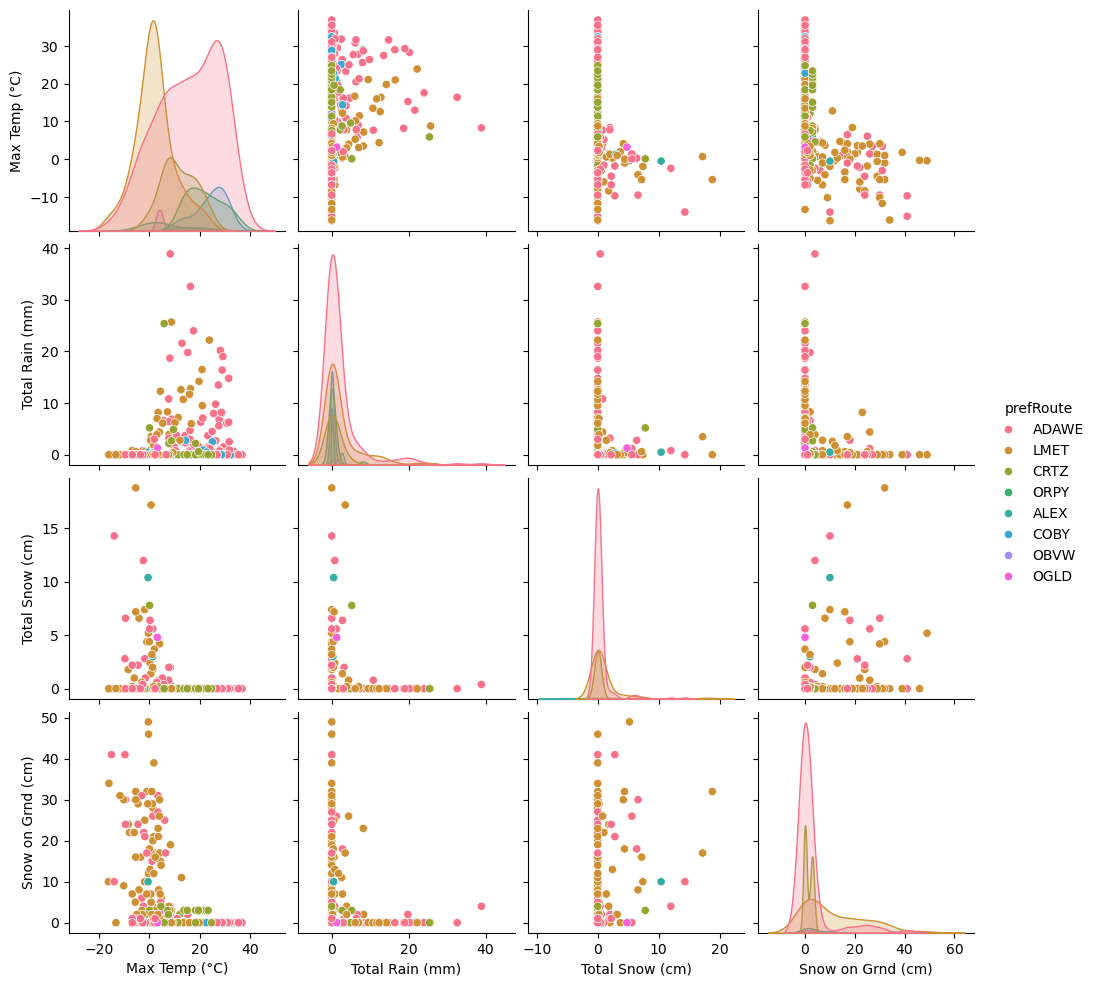

In [7]:
sns.pairplot(df,hue='prefRoute', vars=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)'])
#sns.countplot(x = 'prefRoute', data = df)

The second group of features are: Dir of Max Gust (10s deg), Spd of Max Gust (km/h), hours of daylight (hrs). Again, we are creating colour plots based on values by preRoute

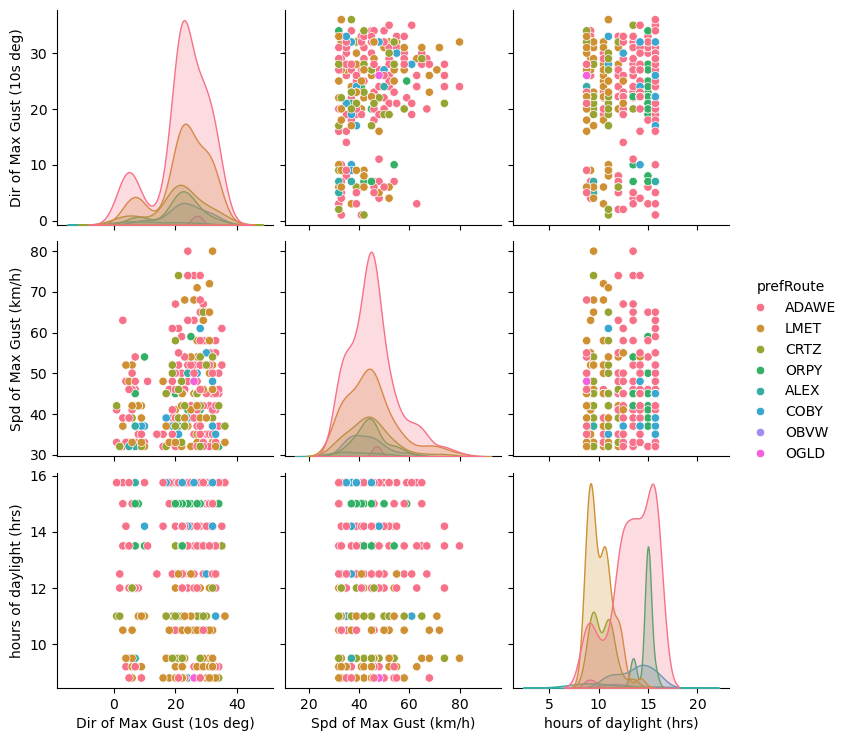

In [8]:
sns.pairplot(df,hue='prefRoute', vars=['Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)'])

The third group of features are: UV Index, holiday, weekday, humidity. Again, we are creating colour plots based on values by preRoute

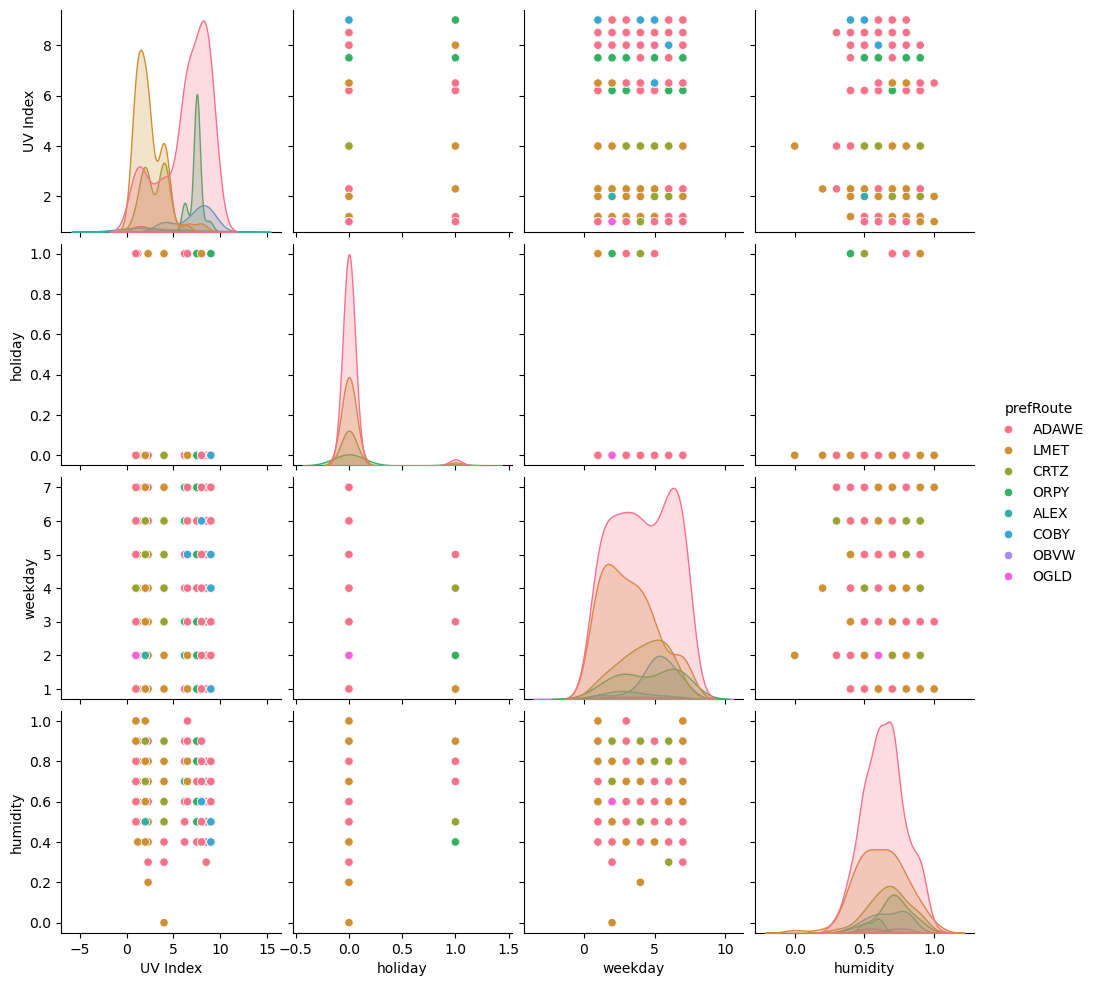

In [9]:
sns.pairplot(df,hue='prefRoute', vars=['UV Index','holiday', 'weekday', 'humidity'])


As noted in Notebook 1 Decision Trees and Notebook 2 Random Forest Tutorials, by looking at the result of pair plots' probability density functions, we can visualize more clearly what properties of the weather and calendar differentiate the bike routes in our dataset.  Keeping in mind that the dataset is heavily biased on the ADAWE route, we notice that humidity, days of the week and whether it's a holiday do not differentiate the routes from one another.
Here's a thought process to analyze what we see:
* 1 - Look at each scatter plot.  Ask yourself: can I easily draw boundaries around each route with geometric shapes such as squares, rectangles, circles, ovals?
* 2 - For those where that's a struggle, then that pair of features doesn't contribute significantly to the accuracy of the model.  For example, how would you go about grouping the route in the plot pair weekday and humidity? You would need some very irregular shaped and strongly overlapping shapes. 
* 3 - For those where it's possible because you can "capture" almost all dots of a given route while keeping the overlap of your boundaries minimal, those feature pairs are good candidates for the model. For example, Speed of Max Gust and Dir of Max Gusts allow us to capture most of the route with relative ease using basic geometric shapes.
* 4 - For those where clear boundaries can be drawn to distinguish a feature pair, those are strong candidates for a better model.
* 5 - Now look at the distribution curves for each feature.  For a given feature, do all the distibutions overlap over one other or do they seem to distiguish some routes. For example, the features 'holiday', 'weekday', 'humidity' have distribution curves all superimposed so they aren't good candidate features for a good working model.  Do you see any others?


Now that we understand the relationship of the data points, we can prepare the Random Forest classifier to make predictions about future patterns based on past cyclist behaviour.

### Random Forest classifier

Now that we have information on the structure of the data set, and its potential for bias to the ADAWE route, in a Random Forest classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
    - Y variable (model ouput): prefRoute
    
For the test data, we have<br>
    - X variables (model inputs): 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)','Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)','UV Index','holiday', 'weekday', 'humidity'<br>
    - Y variable (model ouput): prefRoute
    
Our X variables are all the measurable weather and time properties.<br>
Our Y variable is the prefered route.<br>
Let's create those by removing the relevant columns.

In [10]:
X = df.drop(['prefRoute'],axis=1)
y = df['prefRoute']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


In [12]:

clf=RandomForestClassifier(n_estimators=10)

Notebook 2 Random Forest Tutorial showed you how these classifiers are made up a several Decision Trees on different chunks of data. The model aggregates the output from the trees to get more accurate predictions, in other words, the output of the Random Forest is the class selected by the highest number of Decision Trees in the Random Forest. The number of "estimators" represents the number of Decision Trees we want Random Forest to use for prediction.

Let's set up our first Random Forest classifer with the training variables from above: X_train and y_train.

This Random Forest classifier will have 10 estimators. A general rule to get that number right is to start realtively small and increase until the performance metrics stabilize or start to plateau.  The number depends on the size and complexity of the dataset, with larger and more complex datasets potentially benefitting from a higher number of estimators.

Next we fit the model to the training data.  fit is the same as train.


In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
y_pred=clf.predict(X_test)
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.755


How does the accuracy of predictions from the Random Forest with the newly added data UV Index, holiday, weekday, humidity and hours of daylight compare to the Linear Regression model? Since the train/test split is made of randomly chosen rows and ADAWE route has twice as many data points as the next higher one, the dataset can be considered skewed.  It is nevertheless important to note that there is a noticeable gain in model accuracy mostly due to Random Forest's ability to filter out noise in the data.

Let's test the model by trying to predict the route taken with a given set of data in the predict array: lets predict how likely cyclists will take a route under particular circumstances given by the measurements we chose.

In [15]:
# Choose a route to test by un-commenting the line

#preferedRoute_index = clf.predict([[1.1,3.0,10.0,15,26.0,35,9.2,1.2,1,3,0.8]]) #Expect ADAWE
#preferedRoute_index = clf.predict([[-4.1,0,6.6,8,27,35,9.2,1.2,0,1,0.4]]) # Expect LMET
preferedRoute_index = clf.predict([[12.1,0,0,2,20,45,13.5,6.2,0,7,0.7]]) # Expect CRTZ

print(preferedRoute_index)

['CRTZ']


The test case above predicts the route under the following circumstances:<br>
Temp (°C) is 12.1 C<br>
Total Rain (mm) is 0 mm<br>
Total Snow (cm) is 0 mm<br>
Snow on Grnd (cm) is 2 cm<br>
Dir of Max Gust (10s deg) is 200 Degrees<br>
Spd of Max Gust (km/h) is 45 km/h<br>
hours of daylight (hrs) is 13.5 hours<br>
UV Index is 6.2<br>
holiday is not a holiday<br>
weekday is Sunday (7)<br>
humidity is 70%<br>
For these measurements, we can draw our own guess what the route will be. CRTZ is a good estimate.

Did the estimated route you chose to test come out the same as what the model predicts?  It's important to keep in mind that random sub-sets are generated.  Based on the accuracy, there is still a significant chance (about 28%) that the predicted result could be wrong.  There's more we can do to try to improve that.


##### Feature Importance
Notebook 2 Random Forest Tutorial explained that features represent the variables or attributes that the Decision Tree uses to make predictions. Feature importance are techniques that rank input features based on how useful they will be to an accurate final prediction.

Because of Random Forest's statistical nature, it is possible to evaluate the importance or weight each measurable property or feature of the routes.  Those features are the [Temp (°C), Total Rain (mm), Total Snow (cm), Snow on Grnd (cm), Dir of Max Gust (10s deg), Spd of Max Gust (km/h), hours of daylight (hrs), UV Index,holiday, weekday, humidity].  Feature importance is calculated by looking at how much worse a Decision Tree's  accuracy would be without including that feature during splitting.  More impactful features degrade performance more when omitted.  The process is repeated for all trees (estimators) in the forest, and an averaged measure of the deterioration in accuracy over all trees is assigned to each feature as its importance.

Let's have a look at feature importance by plotting a bar chart of each feature and their respective importance.

In [16]:
input_parameters = pd.Series(clf.feature_importances_,index=['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)','Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index','holiday', 'weekday', 'humidity']).sort_values(ascending=False)
                          
input_parameters.index

Index(['Max Temp (°C)', 'hours of daylight (hrs)', 'UV Index',
       'Dir of Max Gust (10s deg)', 'Snow on Grnd (cm)', 'weekday', 'humidity',
       'Spd of Max Gust (km/h)', 'Total Rain (mm)', 'Total Snow (cm)',
       'holiday'],
      dtype='object')

Let's look at the features in order of importance

Text(0, 0.5, 'Input Parameters')

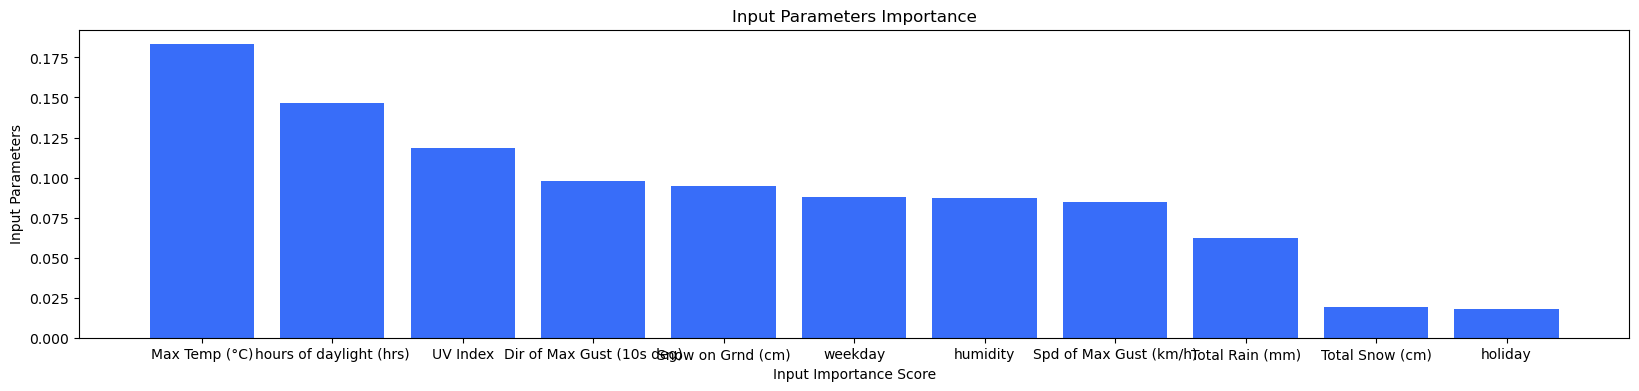

In [17]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 4]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

We notice that the Total Snow and Holiday features have significantly less weight compared to others such as Max Temp, UV Index, or Hours of Light.  Let's get some metrics about importance.  The importance means the significance or influence of each feature in making predictions, and is scaled from 0 to 1 on the x axis.  The larger numerical values mean a feature was used heavily by the model to make splits/decisions and has more predictive power.  The importances sum add up to 1.

In [18]:
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_list = df.columns.drop('prefRoute')
print(feature_list)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Index(['Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)', 'hours of daylight (hrs)', 'UV Index',
       'holiday', 'weekday', 'humidity'],
      dtype='object')
Variable: Max Temp (°C)        Importance: 0.18
Variable: hours of daylight (hrs) Importance: 0.15
Variable: UV Index             Importance: 0.12
Variable: Dir of Max Gust (10s deg) Importance: 0.1
Variable: Snow on Grnd (cm)    Importance: 0.09
Variable: weekday              Importance: 0.09
Variable: humidity             Importance: 0.09
Variable: Spd of Max Gust (km/h) Importance: 0.08
Variable: Total Rain (mm)      Importance: 0.06
Variable: Total Snow (cm)      Importance: 0.02
Variable: holiday              Importance: 0.02


[None, None, None, None, None, None, None, None, None, None, None]

We will next try to get the most accurate predictive model we can possibly get from the Random Forest classifier. 

When using a Random Forest, we can choose to eliminate some of the lower importance features using criteria that are chosen based on the question we are asking the model: Can the model predict the amount of traffic on a route in variable weather conditions?

By setting a threshold we will introduce a bias into the prediction, so the decision for where to set the threshold should reflect a clearly documented methodology. In this tutorial, we will set the threshold at 95% to demonstrate the concept, because the scatter plots above show that the features that will be omitted have little impact on the accuracy of route prediction. 

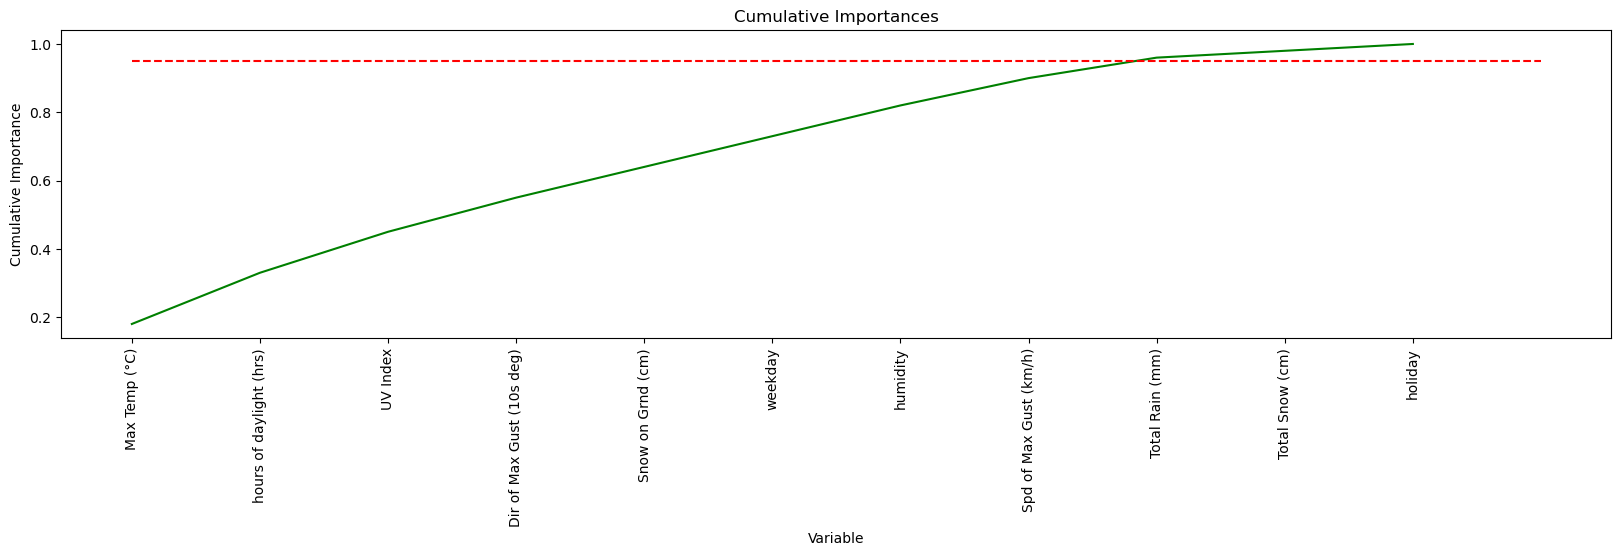

In [19]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');


The green line above represents the cumulative impact of the feature up to the threshold we set to 95% (represented by the red line)

Keeping the features that add up to 95% cumulative weight seems reasonable if we can get accuracy gain from it.  Let's try it.

In [20]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


The sorted_features variable in the cell above lists the features from most to least important. We then take the first 9 representing 95% predictive weight.

In [21]:
print()
print(sorted_features[:9])


['Max Temp (°C)', 'hours of daylight (hrs)', 'UV Index', 'Dir of Max Gust (10s deg)', 'Snow on Grnd (cm)', 'weekday', 'humidity', 'Spd of Max Gust (km/h)', 'Total Rain (mm)']


9 features give us 95% cumulative weight.  Let's rerun the model with those remaining 9 features.  To do that, we eliminate the last 2 columns of our dataset df which are 'Total Snow (cm)', 'holiday'.

In [22]:
# Need to set this up for Workshop

X = df.drop(['prefRoute', 'Total Snow (cm)', 'holiday'],axis=1)
y = df['prefRoute']

Train the classifier again with the new dataset.
First, set up the training and test sets using a 70% train / 30% test split.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=df['prefRoute'], random_state=42)


First we build the model with a train/test split of 70/30.  

In [24]:

clf=RandomForestClassifier(n_estimators=20)

In [25]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

Run the prediction on the test set

In [26]:
y_pred=clf.predict(X_test)

Get accuracy and compare with the one above

In [27]:
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.736


Did you get an improvement in the accuracy of prediction when you removed the least significant features? 

Most of the time, there will be a significant improvement. In this example our accuracy measure improved from 0.754 to 0.773, which is not very significant! We would have to set our threshold for feature importance lower to improve this measure, but this would also increase the bias of the predictions. 

We know from our plotting earlier in the tutorial that this dataset is very unblanced and noisy. Because this dataset is very noisy to begin with, we only see a small difference we could consider more drastic measures like re-balancing the dataset or getting more data. We would have to design our methodology to take this into account and clearly document the potential for bias in the predictions. 

Removing low importance features in a random forest can have the following effects:
- Improves model performance: Eliminating noisy, irrelevant or misleading features prevents them from negatively impacting individual decision trees. This can improve overall random forest accuracy.
- Reduces overfitting: Less features means less likelihood of overfitting to spurious patterns. Removal of unimportant features acts as a form of regularization.
- Speeds up computation: As the number of features decreases, so does the time to train and evaluate trees. Pruning features reduces complexity and increases efficiency.
- Enhances interpretability: Focusing on the most important features makes it easier to explain predictions and understand model behavior. The core signal is retained.
- May decrease model variance: Removing extraneous features may lower variance between individual trees, tightening predictions. But could also remove useful predictors.
- Risks losing information: Low importance may still contain some useful signal. Eliminating too aggressively may degrade model performance if important interactions exist.
The effect also depends on why a feature has low importance. It may be irrelevant or it may be redundant. Redundant features can likely be removed with a minimal impact on model accuracy. But irrelevant features should definitely be removed to improve the random forest.

**However, it should be noted that ...**

In some situations, removing low importance features can lower the accuracy of a random forest model:
- Highly correlated features: If two features are highly correlated, one may get rated as less important. But eliminating it removes useful signal.
- Small dataset size: With little data, importance scores are less reliable. Removing features deemed unimportant could remove useful predictors.
- Interactions with other features: A feature may not be directly predictive but could have interactions that contribute to accuracy. Its removal disables these interactions.
- Noise reduction: A feature with little signal may be acting as a noise filter that improves accuracy. Removing it eliminates this regularization effect.
- Target leakage: A feature unrelated to the target may leak signal from the target itself. Removing it eliminates this leakage which benefited accuracy.
- Simplistic importance metric: The importance metric used may not fully capture a feature's contribution. The tree structure matters.
- Capturing side effects: An unimportant feature may capture some secondary effects or proxies that contribute a bit to accuracy.
In general, if the low importance features exhibit any interactions, redundancies or hidden effects, removing too many of them could degrade the performance of the random forest model. A careful balance is needed.

**Summary**<br><br>
It should be emphasized again that, as observed at the beginning of the tutorial, the dataset is heavily weighted to the ADAWE route. That route's data represents around 50% of the whole dataset, then the neareast one drops to 32%, then 10% and so on.  With that we were able to achieve 72% model accuracy which is not bad considering these gaps.  The next steps should be first to look for and trim away any features had may be highly correlated to others. We saw how to do that in Notebook 1 Decision Tree Tutorial. The second step would be to get more data for the other routes or consider removing some routes altogether. The aim would be to get a more balanced distribution of data for the outcome we want to predict.

In brief, we covered the following tasks:
- Imported the required libraries for the tutorial
- Loaded the cleaned data2020 dataset from the Linear Regression tutorial with new features added: hours of daylight (hrs),UV Index,holiday,weekday,humidity
- Verified and visualized the dataset using function like groupby(), head(), pairplot(), etc.
- Split the dataset into training and test sets
- Created an instance of the random forest classifier
- Trained the random forest classifier on the training data
- Evaluated the trained model to make predictions on new data
- Implemented the notion of feature importance to the model to eliminate lower importance features.  We set the threshold at 95% to demonstrate the concept, because the scatter plots above show that the features that will be omitted have little impact on the accuracy of route prediction.
- We discovered that random forest classifier does a better job at classifying the data compared to the Linear Regression classifier.
